# Customer Churn - Exploratory Data Analysis

## Objective
Understand customer behaviour patterns and identify key factors associated with churn, to guide feature engineering and model selection for a churn prediction systems.

## Business Context

Customer churn directly impacts revenue and growth.
The goal of this analysis is to identify customers at high risk of churn so that proactive retention strategies cab be applied.

**Key considerations:**
- Churn is a binary outcome
- False negatives are costly
- Predictions must be explainable to business users

In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

- Number of rows: 7043
- Number of columns: 21 

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Quality Checks

### Observations

- No duplicate records found
- No null values found

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Target Variable Analysis

In [10]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

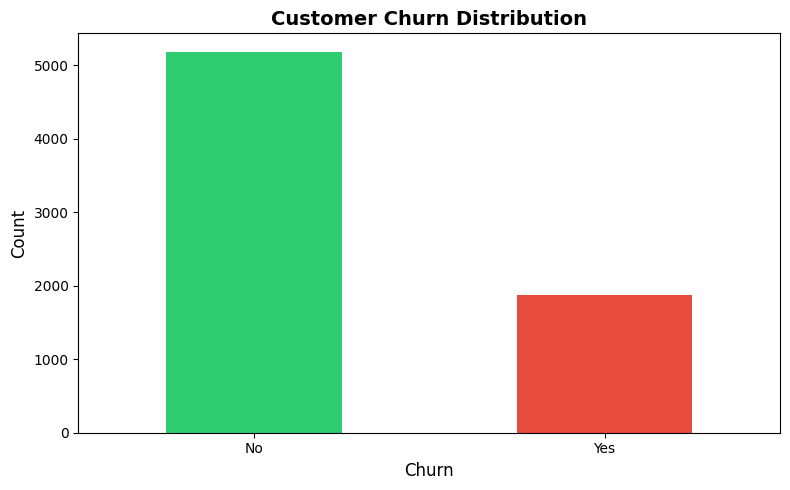

In [3]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar', figsize=(8, 5), color=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Target Variable Distribution

- Churn rate: 73%
- Indicates class imbalance

## Univariate Analysis

In [11]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


## Tenure and Charges Analysis by Churn

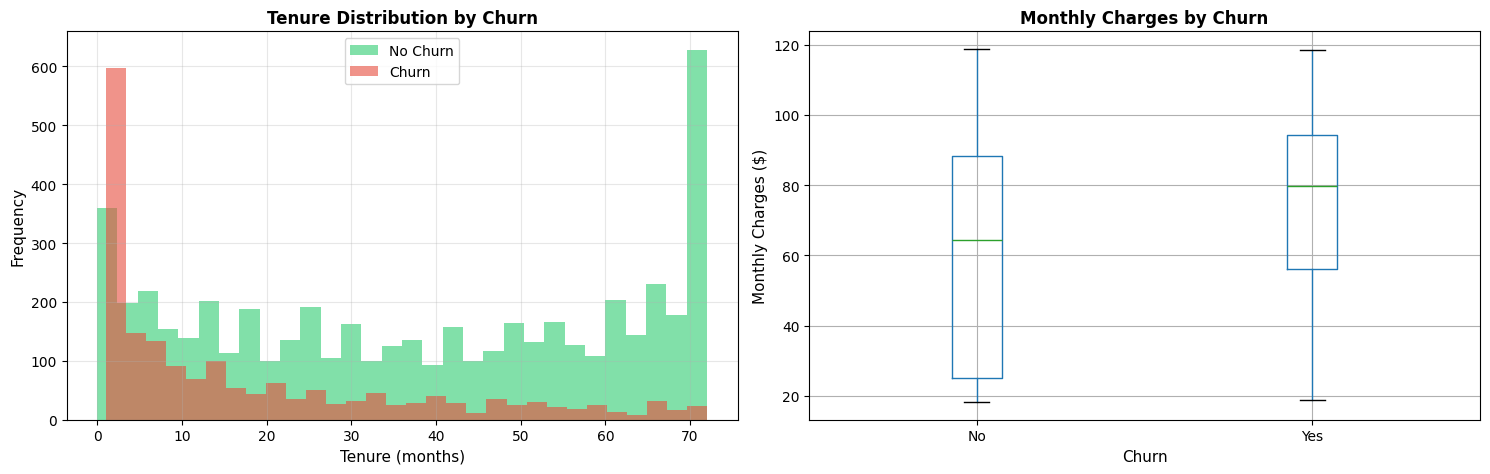

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Tenure distribution by churn
df[df['Churn'] == 'No']['tenure'].hist(bins=30, alpha=0.6, label='No Churn', ax=axes[0], color='#2ecc71')
df[df['Churn'] == 'Yes']['tenure'].hist(bins=30, alpha=0.6, label='Churn', ax=axes[0], color='#e74c3c')
axes[0].set_title('Tenure Distribution by Churn', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tenure (months)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Charges by churn
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Churn', fontsize=11)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=11)
plt.suptitle('')  # Remove the automatic title
plt.tight_layout()
plt.show()

## Categorical Feature Impact

In [5]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [6]:
pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index')


Churn,No,Yes
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099


In [7]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


## Correlation and Leakage Check

In [8]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000
